# Import required modules

In [315]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the loan.csv file

In [144]:
loandata = pd.read_csv('loan.csv')
loandata.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 2. Data Filter and Cleaning

### 2(a). Remove columns containing either 75 % or more than 75 % Null Values

In [145]:
loandata = loandata.loc[:, loandata.isnull().mean() < .75]
loandata.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2(b). List out the columns after dropping them

In [146]:
loandata.columns      ###List out the columns after removing columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### 2(c). Count the missing values from all the columns

In [147]:
loanna = loandata.isnull().sum()    ### Find the sum of missing values from all the columns
loanna

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### 2(d). Display the bar chart of null values from the dataframe

<AxesSubplot:>

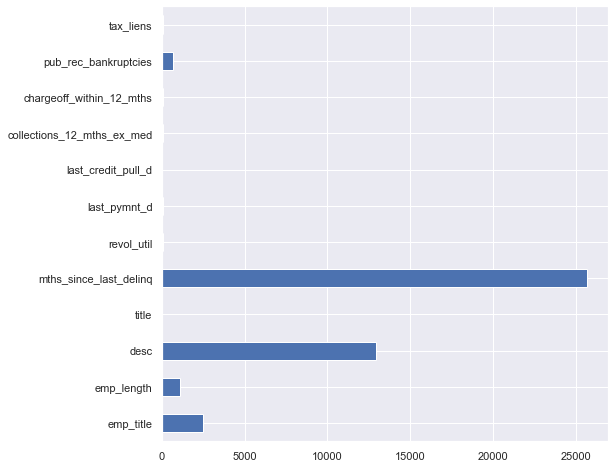

In [148]:
loandata.isnull().sum()[loandata.isnull().sum() >0].plot(kind='barh')

# 3. Fill the Null values and Manipulate the values in all columns

### 3(a). Fill the null values in the columns

In [149]:
loandata['emp_length'] = loandata['emp_length'].fillna('NA')
loandata['desc'] = loandata['desc'].fillna('NA')

### 3(b). Fill the missing values with the observable/Relevant data

In [150]:
loandata['emp_title'] = loandata['emp_title'].fillna('other')
loandata['title'] = loandata['title'].fillna('other')
loandata['mths_since_last_delinq'] = loandata['mths_since_last_delinq'].fillna('0.0')
loandata['collections_12_mths_ex_med'] = loandata['collections_12_mths_ex_med'].fillna('0.0')
loandata['chargeoff_within_12_mths'] = loandata['chargeoff_within_12_mths'].fillna('0.0')
loandata['revol_util'] = loandata['revol_util'].fillna('0%')
loandata['pub_rec_bankruptcies'] = loandata['pub_rec_bankruptcies'].fillna('0.0')
loandata['tax_liens'] = loandata['tax_liens'].fillna('0.0')

### 3(c). Remove left space and extra characters from the column values

In [151]:
loandata['term'] = loandata['term'].apply(lambda x: x.lstrip())

In [152]:
loandata['desc'] = loandata['desc'].apply(lambda x: x.lstrip())

In [153]:
loandata['zip_code'] = loandata['zip_code'].apply(lambda x: x.rstrip('xx'))

In [253]:
loandata['int_rate'] = loandata['int_rate'].apply(lambda x: x.rstrip('%'))

### 3(d). Fill the data in Date columns

In [161]:
loandata['last_pymnt_d'] = loandata['last_pymnt_d'].add('-2023') ###Adding the year 

In [162]:
loandata['issue_d'] = loandata['issue_d'].add('-2023')   ###Adding the year

#### Apply the function Date for convertion

In [189]:
def convert_date(date_str): 
    parsed_date = datetime.strptime(str(date_str), '%b-%d-%Y') 
    formatted_date = parsed_date.strftime("%Y-%m-%d") 
    return formatted_date

In [190]:
loandata['last_pymnt_d'] = loandata['last_pymnt_d'].apply(lambda x: convert_date(x))
loandata['last_pymnt_d']

0        2023-01-15
1        2023-04-13
2        2023-06-14
3        2023-01-15
4        2023-05-16
            ...    
39712    2023-07-10
39713    2023-07-10
39714    2023-04-08
39715    2023-01-08
39716    2023-06-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [192]:
loandata['issue_d'] = loandata['issue_d'].apply(lambda x: convert_date(x))
loandata['issue_d']

0        2023-12-11
1        2023-12-11
2        2023-12-11
3        2023-12-11
4        2023-12-11
            ...    
39712    2023-07-07
39713    2023-07-07
39714    2023-07-07
39715    2023-07-07
39716    2023-06-07
Name: issue_d, Length: 39717, dtype: object

#### Updating the 'earliest_cr_line' date format, which it have month-year and convert to year-month-date

In [214]:
loandata['earliest_cr_line'].shape[0]

39717

#### Adding Random days in a new column 'days'

In [215]:
import numpy as np
loandata['days'] = np.random.randint(1, 31, loandata['earliest_cr_line'].shape[0])
loandata['days'].shape[0]

39717

In [217]:
loandata['earliestcr_format'] = loandata[['earliest_cr_line','days']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)
loandata['earliestcr_format'].unique()

array(['Jan-85-15', 'Apr-99-6', 'Nov-01-22', ..., 'Feb-85-21',
       'Feb-69-19', 'Nov-88-2'], dtype=object)

# 4. Filter the outlier and Filter it

#### Create box plot and check Outlier for set of the columns and apply the inter-quartile range to detect the outliers and filter it

In [218]:
sns.set(rc={"figure.figsize":(6, 4)})

### 04(a). loan_amnt, funded_amnt, funded_amnt_inv

<AxesSubplot:>

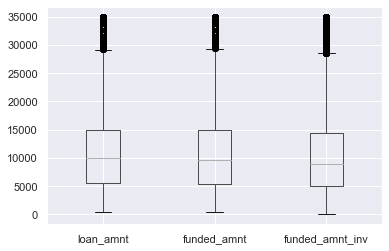

In [219]:
loandata.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'])

#### Filter the data with IQR (Interquartile range)

In [230]:
Q1 = loandata['loan_amnt'].quantile(0.25)
Q3 = loandata['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['loan_amnt'] >= Q1 - 1.5 * IQR) & (loan['loan_amnt'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

In [231]:
Q1 = loandata['funded_amnt'].quantile(0.25)
Q3 = loandata['funded_amnt'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['funded_amnt'] >= Q1 - 1.5 * IQR) & (loandata['funded_amnt'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter]

In [232]:
Q1 = loandata['funded_amnt_inv'].quantile(0.25)
Q3 = loandata['funded_amnt_inv'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['funded_amnt_inv'] >= Q1 - 1.5 * IQR) & (loandata['funded_amnt_inv'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter]

<AxesSubplot:>

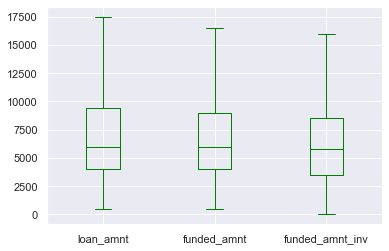

In [233]:
loandata.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], color="green")

#### 04(b). total_pymnt,      total_pymnt_inv,       total_rec_prncp,       total_rec_int,      last_pymnt_amnt

In [238]:
sns.set(rc={"figure.figsize":(9, 9)})

<AxesSubplot:>

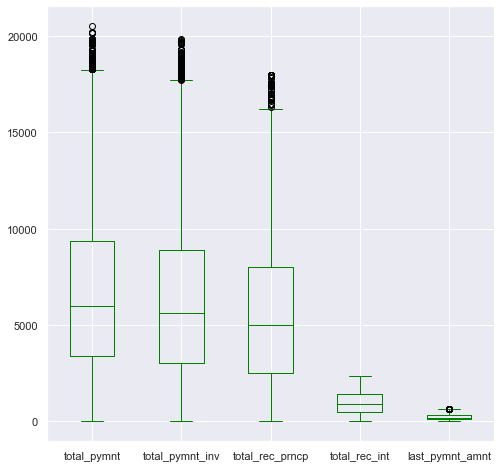

In [137]:
loan.boxplot(column=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'last_pymnt_amnt'], color="green")

In [241]:
Q1 = loandata['total_pymnt'].quantile(0.25)
Q3 = loandata['total_pymnt'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['total_pymnt'] >= Q1 - 1.5 * IQR) & (loandata['total_pymnt'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

In [242]:
Q1 = loandata['total_pymnt_inv'].quantile(0.25)
Q3 = loandata['total_pymnt_inv'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['total_pymnt_inv'] >= Q1 - 1.5 * IQR) & (loandata['total_pymnt_inv'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

In [243]:
Q1 = loandata['last_pymnt_amnt'].quantile(0.25)
Q3 = loandata['last_pymnt_amnt'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['last_pymnt_amnt'] >= Q1 - 1.5 * IQR) & (loandata['last_pymnt_amnt'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

<AxesSubplot:>

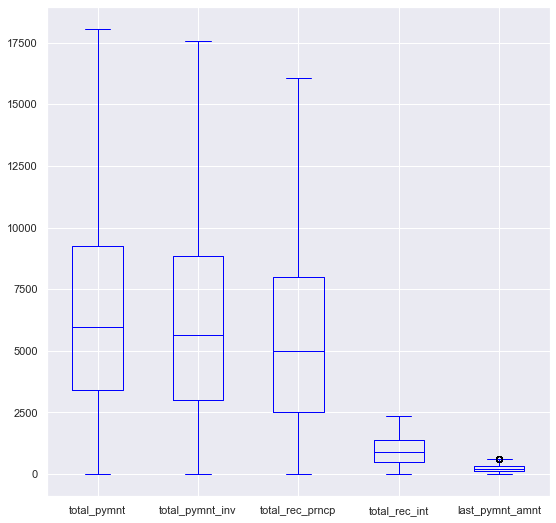

In [245]:
loandata.boxplot(column=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'last_pymnt_amnt'], color="blue")

### 4(c). total_acc and open_acc

<AxesSubplot:>

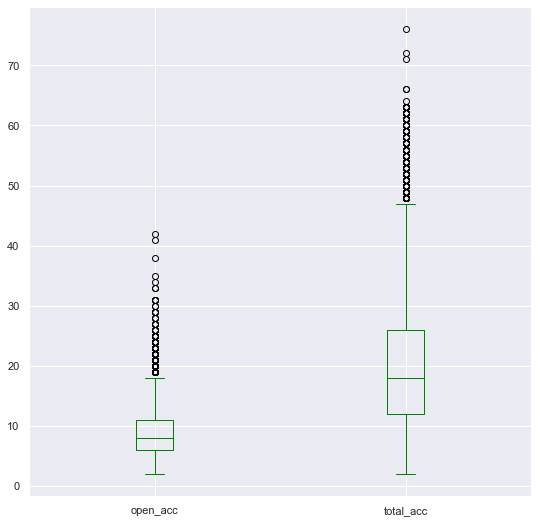

In [246]:
loandata.boxplot(column=['open_acc','total_acc'], color="green")

In [247]:
Q1 = loandata['open_acc'].quantile(0.25)
Q3 = loandata['open_acc'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['open_acc'] >= Q1 - 1.5 * IQR) & (loandata['open_acc'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

In [248]:
Q1 = loandata['total_acc'].quantile(0.25)
Q3 = loandata['total_acc'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (loandata['total_acc'] >= Q1 - 1.5 * IQR) & (loandata['total_acc'] <= Q3 + 1.5 *IQR)
loandata = loandata.loc[filter] 

<AxesSubplot:>

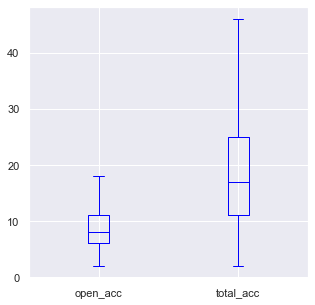

In [294]:
sns.set(rc={"figure.figsize":(5, 5)})
loandata.boxplot(column=['open_acc','total_acc'], color="blue")

.

#  5. Data Analysis

.

### 5(a). Derived Metrics

In [318]:
loandata['loan_inc_ratio'] = loandata['loan_amnt']/loandata['annual_inc']
loandata['loan_inc_ratio'].head(8)

0    0.208333
1    0.083333
3    0.203252
4    0.037500
5    0.138889
7    0.062500
8    0.140000
9    0.358333
Name: loan_inc_ratio, dtype: float64

### 5(b). Categorical Variables

#### Loan Status

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

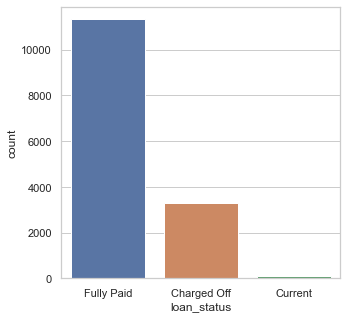

In [295]:
sns.set_theme(style="whitegrid")  
sns.countplot(loandata['loan_status'])

#### Loan Term with 'Loan Status'

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

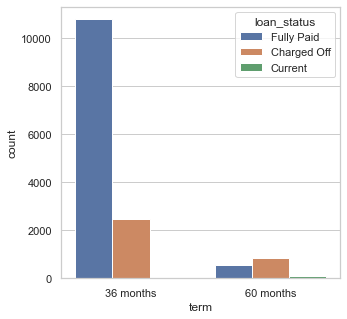

In [302]:
sns.countplot(loandata['term'],hue=loandata['loan_status'])

#  5(c). Correlation from the dataframe

#### correlation 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'

In [296]:
datcorla = loandata[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']]

<AxesSubplot:>

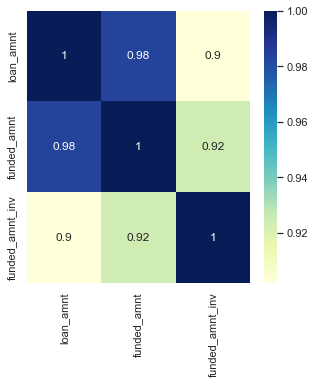

In [297]:
sns.heatmap(datcorla.corr(), cmap="YlGnBu", annot=True)

#### correlation from 'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'last_pymnt_amnt'

In [298]:
datcorlb = loandata[['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'last_pymnt_amnt']]

<AxesSubplot:>

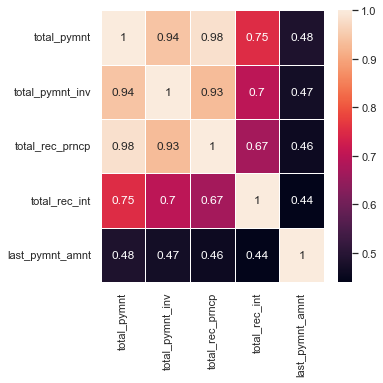

In [299]:
sns.heatmap(datcorlb.corr(), annot=True, linewidth=.5)

#### Loan amount applied by member living in own or rent and analysing with funded amount & annual income (Risk analisys)

In [307]:
df = loandata.groupby(by=['home_ownership','loan_amnt']).mean()
df1 = df[['funded_amnt','annual_inc']]
df1

funded_amnt    annual_inc
home_ownership loan_amnt                            
MORTGAGE       500          500.000000  30968.013333
               800          800.000000  35000.000000
               1000        1000.000000  58087.648649
               1050        1050.000000  31200.000000
               1100        1100.000000  36000.000000
...                                ...           ...
RENT           16750      11600.000000  39000.000000
               16775       9275.000000  83000.000000
               16800      10775.000000  60000.000000
               17000      10987.500000  62500.000000
               17500      11808.333333  53600.000000

[949 rows x 2 columns]

#### Heat map for risk analysis corelation between laon_amnt, funded_amnt and anual_inc

In [312]:
risk = loandata[['loan_amnt','funded_amnt','annual_inc']]

<AxesSubplot:>

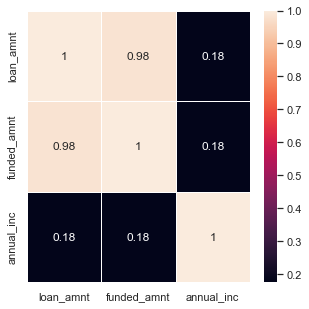

In [313]:
sns.heatmap(risk.corr(), annot=True, linewidth=.5)